In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,10)})

In [36]:
pb = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/pb_gpt2-ft_all.csv')
len(pb)


49012

In [37]:
# chains = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/pbchains_gpt2-ft_all.csv')
chains = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/pbchains_gpt2-ft_both_contexts.csv')
len(chains)


14431

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_57806/141223998.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = pb_dial.groupby('position_in_dialogue').mean()
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_57806/141223998.py:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = pb_round.groupby('position_in_round').mean()
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_57806/141223998.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify n

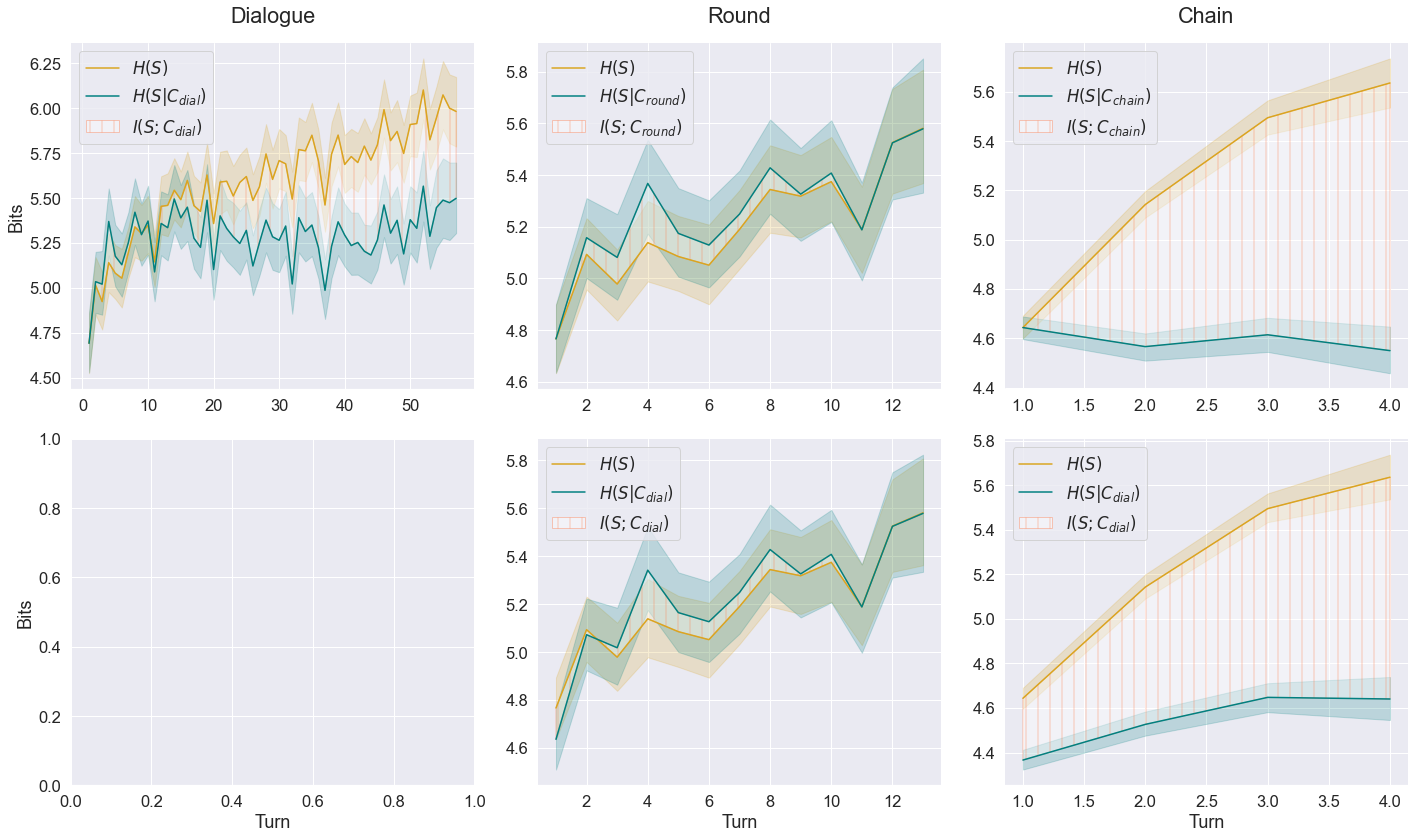

In [42]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

# Limit plot size by removing last positions
max_pos_dial = math.ceil(
    pb['position_in_dialogue'].mean() + pb['position_in_dialogue'].std() * 1
)
max_pos_round = math.ceil(
    pb['position_in_round'].mean() + pb['position_in_round'].std() * 1
)

# print(max_pos)
pb_dial = pb[pb["position_in_dialogue"] <= max_pos_dial]
pb_round = pb[pb["position_in_dialogue"] <= max_pos_round]


# Set up figure
cols = ["Dialogue", "Round", "Chain"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large', pad=20)


# 0,0: dialogue
# ---------------------------------------------
sns.lineplot(data=pb_dial,
             x="position_in_dialogue", y="normalised_h", legend=False, color='goldenrod', ax=axes[0,0], label='$H(S)$')

sns.lineplot(data=pb_dial,
             x="position_in_dialogue", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[0,0], label='$H(S|C_{dial})$')

means_df = pb_dial.groupby('position_in_dialogue').mean()
axes[0,0].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )

# 0,1: round, context = round
# ---------------------------------------------
sns.lineplot(data=pb_round,
             x="position_in_round", y="normalised_h", legend=False, color='goldenrod', ax=axes[0,1], label='$H(S)$')

sns.lineplot(data=pb_round,
             x="position_in_round", y="normalised_h_round_number", legend=False, color='teal', ax=axes[0,1], label='$H(S|C_{round})$')

means_df = pb_round.groupby('position_in_round').mean()
axes[0,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_round_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{round})$'
                )

# 0,2: chain, context = chain
# ---------------------------------------------
sns.lineplot(data=chains,
             x="position_in_chain", y="normalised_h", legend=False, color='goldenrod', ax=axes[0,2], label='$H(S)$')

sns.lineplot(data=chains,
             x="position_in_chain", y="normalised_h_chains_id", legend=False, color='teal', ax=axes[0,2], label='$H(S|C_{chain})$')

means_df = chains.groupby('position_in_chain').mean()
axes[0,2].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_chains_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{chain})$'
                )


# 1,1: round, context = dialogue
# ---------------------------------------------
sns.lineplot(data=pb_round,
             x="position_in_round", y="normalised_h", legend=False, color='goldenrod', ax=axes[1,1], label='$H(S)$')

sns.lineplot(data=pb_round,
             x="position_in_round", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[1,1], label='$H(S|C_{dial})$')

means_df = pb_round.groupby('position_in_round').mean()
axes[1,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )

# 1,2: chain, context = chain
# ---------------------------------------------
sns.lineplot(data=chains,
             x="position_in_chain", y="normalised_h", legend=False, color='goldenrod', ax=axes[1,2], label='$H(S)$')

sns.lineplot(data=chains,
             x="position_in_chain", y="hsc_dial", legend=False, color='teal', ax=axes[1,2], label='$H(S|C_{dial})$')

means_df = chains.groupby('position_in_chain').mean()
axes[1,2].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['hsc_dial'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )


# Set labels for whole figure
axes[1,0].set_xlabel("Turn")
axes[1,1].set_xlabel("Turn")
axes[1,2].set_xlabel("Turn")
axes[0,0].set_ylabel("Bits")
axes[1,0].set_ylabel("Bits")
for i in range(3):
    axes[0,i].set_xlabel("")
for i in range(2):
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

axes[0,0].legend(loc='upper left')
axes[0,1].legend(loc='upper left')
axes[0,2].legend(loc='upper left')
axes[1,1].legend(loc='upper left')
axes[1,2].legend(loc='upper left')

# axes[0,1].legend(loc='upper left')

# fig = sns_plot.get_figure()

# sns_plot.set_xticks(np.arange(0, max_pos, 50))

sns.despine(left=True)
plt.tight_layout()
plt.show()


### Mutual information I(S;C) only

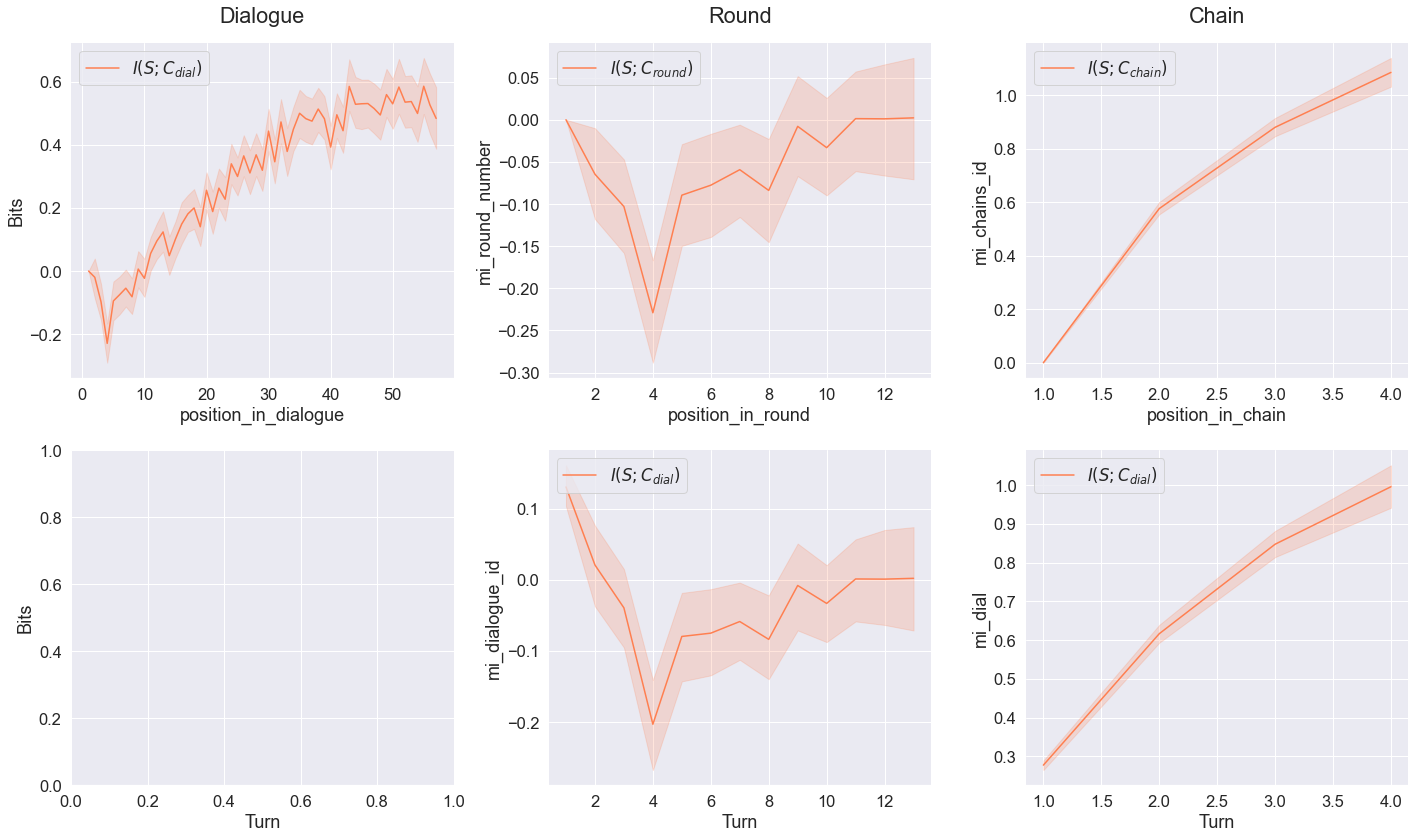

In [43]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

# Limit plot size by removing last positions
max_pos_dial = math.ceil(
    pb['position_in_dialogue'].mean() + pb['position_in_dialogue'].std() * 1
)
max_pos_round = math.ceil(
    pb['position_in_round'].mean() + pb['position_in_round'].std() * 1
)

# print(max_pos)
pb_dial = pb[pb["position_in_dialogue"] <= max_pos_dial]
pb_round = pb[pb["position_in_dialogue"] <= max_pos_round]


# Set up figure
cols = ["Dialogue", "Round", "Chain"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large', pad=20)


# 0,0: dialogue
# ---------------------------------------------
sns.lineplot(data=pb_dial,
             x="position_in_dialogue", y="mi_dialogue_id", legend=False, color='coral', ax=axes[0,0], label='$I(S;C_{dial})$')

# 0,1: round, context = round
# ---------------------------------------------
sns.lineplot(data=pb_round,
             x="position_in_round", y="mi_round_number", legend=False, color='coral', ax=axes[0,1], label='$I(S;C_{round})$')

# 0,2: chain, context = chain
# ---------------------------------------------
sns.lineplot(data=chains,
             x="position_in_chain", y="mi_chains_id", legend=False, color='coral', ax=axes[0,2], label='$I(S;C_{chain})$')

# 1,1: round, context = dialogue
# ---------------------------------------------
sns.lineplot(data=pb_round,
             x="position_in_round", y="mi_dialogue_id", legend=False, color='coral', ax=axes[1,1], label='$I(S;C_{dial})$')

# 1,2: chain, context = chain
# ---------------------------------------------
sns.lineplot(data=chains,
             x="position_in_chain", y="mi_dial", legend=False, color='coral', ax=axes[1,2], label='$I(S;C_{dial})$')


# Set labels for whole figure
axes[1,0].set_xlabel("Turn")
axes[1,1].set_xlabel("Turn")
axes[1,2].set_xlabel("Turn")
axes[0,0].set_ylabel("Bits")
axes[1,0].set_ylabel("Bits")

axes[0,0].legend(loc='upper left')
axes[0,1].legend(loc='upper left')
axes[0,2].legend(loc='upper left')
axes[1,1].legend(loc='upper left')
axes[1,2].legend(loc='upper left')

# axes[0,1].legend(loc='upper left')

# fig = sns_plot.get_figure()

# sns_plot.set_xticks(np.arange(0, max_pos, 50))

sns.despine(left=True)
plt.tight_layout()
plt.show()